# MLP-CW4 Final Evaluation

Model to be used

- 40x    7a run3
- 100x   5a run3
- 200x   5a run1
- 400x   4c run2


## Imports

In [1]:
# set the matplotlib backend so figures can be saved in the background
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import matplotlib
import keras
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2

import shutil
import fnmatch
import pickle
from keras import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Input
from keras.constraints import max_norm
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
import keras.initializers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import keras.optimizers
from keras.utils import np_utils
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import imgaug as ia
from imgaug import augmenters as iaa

/home/as12production/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Training Plots

train_data = dict()


#train_files = ["train_baseline.pickle","train2.pickle","train3.pickle","train4.pickle"]

train_files = ["train_baseline.pickle","train_40x.pickle","train_100x.pickle","train_200x.pickle","train_400x.pickle"]
for i in range(4):
    train_data[i] = pickle.load( open( train_files[i], "rb" ) )


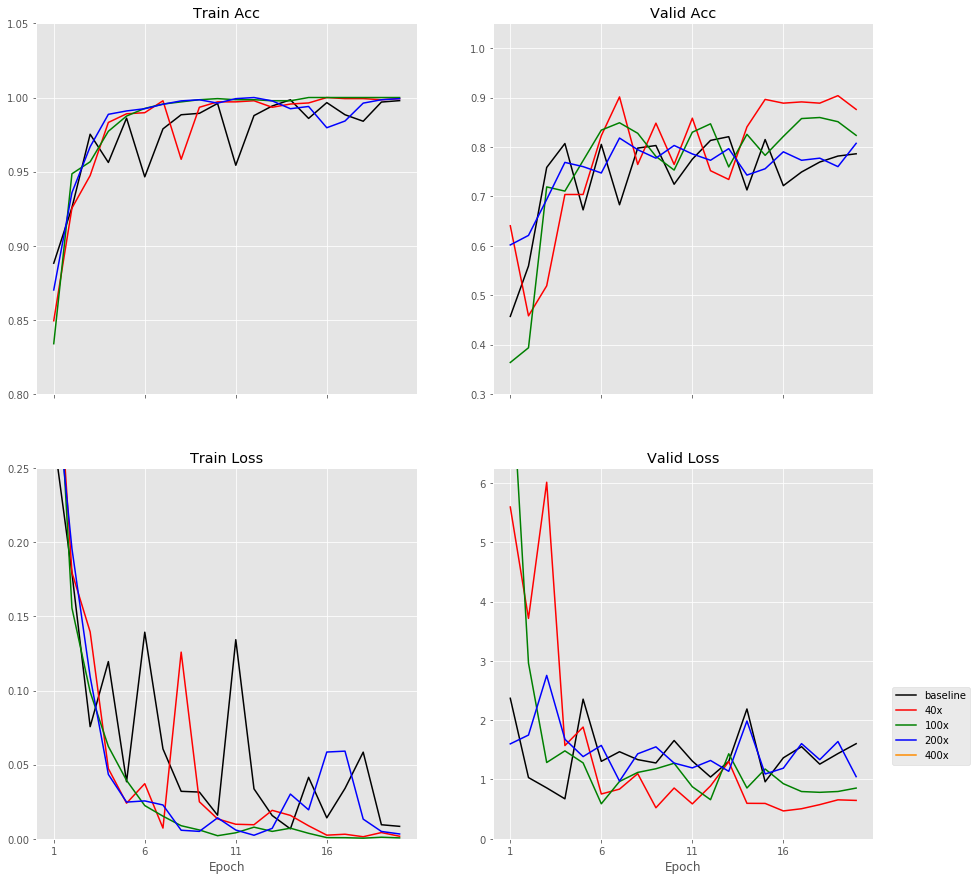

In [26]:
import matplotlib.lines as mlines
fig, axn = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(15,15))

graph_labels = ["Train Acc", "Valid Acc", "Train Loss",  "Valid Loss"]
key_value = ['acc','val_acc','loss','val_loss']
data_label = ['baseline','40x','100x','200x','400x']
data_color = ["black","red","green","blue","darkorange"]
for i, ax in enumerate(axn.flat):
    for j in range(len(train_data)):
        ax.plot(train_data[j][key_value[i]], label=data_label[j], color=data_color[j])
    ax.set_title(graph_labels[i])
    if 'acc' == key_value[i]:
        ax.set_ylim([0.8,1.05])
    elif 'val_acc' == key_value[i]:
        ax.set_ylim([0.3,1.05])
    elif 'loss' == key_value[i]:
        ax.set_ylim([0,0.25])
        ax.set_xlabel("Epoch")
    elif 'val_loss' == key_value[i]:
        ax.set_ylim([0,6.25])
        ax.set_xlabel("Epoch")
    ax.set_xticks(range(0,20,5))
    ax.set_xticklabels(range(1,21,5))
    #ax.set_xticklabels(str(range(1,21,5))
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

handle = []
for i in range(len(data_color)):
    handle.append(mlines.Line2D([], [], color=data_color[i],markersize=15, label=data_label[i]))
ax.legend(handles=handle,bbox_to_anchor=(1.05,0.2),  loc='lower left', borderaxespad=0.)
plt.grid(True)
plt.savefig("Training.pdf")
plt.show()

In [4]:
plt.style.use('ggplot')
accuracy_plot = plt.figure(figsize=(15,10))
data = np.array(train['val_acc'])
plt.plot(data)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.ylim((0,1.2))
#plt.legend(['acc(valid)', 'acc(train)'], loc='upper left')
plt.grid(True)
plt.show()

NameError: name 'train' is not defined

In [ ]:
def generateTrainingPlots(history, accuracy_grap_file, loss_graph_file):
    plt.style.use('ggplot')
    accuracy_plot = plt.figure(figsize=(15,10))
    for k in ['val_acc', 'acc']:
        data = np.array(history[k])
        plt.plot(data)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch Number')
    plt.ylim((0,1.2))
    plt.legend(['acc(valid)', 'acc(train)'], loc='upper left')
    plt.grid(True)
    plt.show()
    loss_plot = plt.figure(figsize=(15,10))
    for k in ['loss', 'val_loss']:
        data = np.array(history[k])
        plt.plot(data)
    plt.title('Model Loss')
    plt.ylabel('Error (Log Loss)')
    plt.xlabel('Epoch Number')
    plt.grid(True)
    plt.legend(['error(train)', 'error(valid)'], loc='upper left')
    plt.show()
    #Save visualization data    
    accuracy_plot.savefig(accuracy_grap_file, bbox_inches='tight')
    loss_plot.savefig(loss_graph_file, bbox_inches='tight')
